In [1]:
import sys
sys.path.append('..')
from osp import *

In [2]:
df_pmla = get_pmla_df().set_index('id')

100%|██████████| 71902/71902 [00:03<00:00, 21316.21it/s]


In [3]:
df_jstor = get_jstor_data().set_index('id')

In [4]:
def collect_tree_stats(stash):
    all_tree_stats = []
    for id,docstr in tqdm(stash.items(),total=len(stash)):
        doc = stanza.Document.from_serialized(docstr)
        tree_stats = pd.DataFrame(get_tree_stats(sent) for sent in doc.sentences)
        tree_stats['id'] = id
        all_tree_stats.append(tree_stats)
    all_tree_stats = pd.concat(all_tree_stats)
    for col in all_tree_stats.columns:
        if col not in ['id','num_words']:
            all_tree_stats[col+'_per_word'] = all_tree_stats[col] / all_tree_stats['num_words']
    return all_tree_stats

In [5]:
def get_pmla_tree_df():
    df_pmla = get_pmla_df().set_index('id')
    all_tree_stats = collect_tree_stats(PMLA_STASH)
    df_all_tree_stats = all_tree_stats.merge(df_pmla, on='id', how='left')
    return df_all_tree_stats

In [6]:
df_pmla_tree = get_pmla_tree_df()

100%|██████████| 120/120 [00:45<00:00,  2.61it/s]


In [7]:
def get_jstor_tree_df():
    df_jstor = get_jstor_data().set_index('id')
    all_tree_stats = collect_tree_stats(JSTOR_STASH)
    df_all_tree_stats = all_tree_stats.merge(df_jstor, on='id', how='left')
    return df_all_tree_stats

In [8]:
df_jstor_tree = get_jstor_tree_df()

100%|██████████| 2474/2474 [16:05<00:00,  2.56it/s]


In [9]:
df_combined = pd.concat([df_pmla_tree.assign(discipline='Literature'), df_jstor_tree.assign(discipline='Philosophy')])

In [18]:
df_combined.groupby(['discipline','decade'])['id'].nunique()

discipline  decade
Literature  1900       10
            1910       10
            1920       10
            1930       10
            1940       10
            1950       10
            1960       10
            1970       10
            1980       10
            1990       10
            2000       10
            2010       10
Philosophy  1880       26
            1890      163
            1900      167
            1910      177
            1920      171
            1930      174
            1940      179
            1950      178
            1960      178
            1970      176
            1980      176
            1990      179
            2000      177
            2010      177
            2020      176
Name: id, dtype: int64

In [ ]:
odf = df_combined.groupby(['discipline','decade']).mean(numeric_only=True)
# odf

num_words     height  num_independent_clauses  \
discipline decade                                                  
Literature 1900    30.954346  11.784866                 1.362727   
           1910    29.052976  11.080445                 1.381949   
           1920    33.138520  12.216319                 1.433903   
           1930    27.462500  10.114643                 1.305357   
           1940    34.832450  12.090728                 1.496689   
           1950    29.737035  12.501310                 1.509691   
           1960    30.000903  11.892148                 1.436823   
           1970    32.356302  13.283908                 1.756651   
           1980    35.740570  14.228611                 1.720331   
           1990    32.296159  12.893030                 1.495306   
           2000    34.740773  12.558512                 1.544492   
           2010    33.245077  12.599562                 1.391138   
Philosophy 1880    30.763579  13.740466                 1.703979   
           1890    30.092866  13.472069                 1.631665   
           1900    30.409178  13.633768                 1.646031   
           1910    29.313881  13.473143                 1.632177   
           1920    29.336651  13.374912                 1.611996   
           1930    24.501258   8.600959                 0.831613   
           1940    28.538058  10.605121                 1.259567   
           1950    28.560187  10.453480                 1.250356   
           1960    30.062119  10.741669                 1.277425   
           1970    29.400882  13.480397                 1.551471   
           1980    30.464395  13.969242                 1.599396   
           1990    29.423010  13.634906                 1.530895   
           2000    29.301976  13.635323                 1.501802   
           2010    27.418905  13.094624                 1.370376   
           2020    26.822651  12.516777                 1.269964   

                   num_dependent_clauses  num_words_in_dependent_clauses  \
discipline decade                                                          
Literature 1900                 0.772983                       11.511570   
           1910                 0.740353                       11.200785   
           1920                 0.893738                       15.001898   
           1930                 0.532500                        7.755714   
           1940                 0.892715                       14.450331   
           1950                 0.808800                       12.481404   
           1960                 0.830325                       13.332581   
           1970                 1.054950                       15.446577   
           1980                 1.185373                       18.754830   
           1990                 0.886486                       14.323186   
           2000                 0.897568                       14.618026   
           2010                 0.789387                       14.057440   
Philosophy 1880                 1.311045                       18.936437   
           1890                 1.254295                       18.712341   
           1900                 1.306944                       19.318613   
           1910                 1.198259                       17.432243   
           1920                 1.150807                       16.768345   
           1930                 0.394338                        5.533003   
           1940                 0.686793                        9.913562   
           1950                 0.644827                        9.382291   
           1960                 0.740305                       11.121742   
           1970                 1.309930                       19.827614   
           1980                 1.380707                       20.714055   
           1990                 1.266293                       19.028712   
           2000                 1.341275                       20.1741

In [11]:
odf = df_combined.groupby(['discipline','decade']).mean(numeric_only=True)
figdf = odf.drop(columns=['year','publicationYear','wordCount','pageCount']).reset_index().melt(id_vars=['decade','discipline'])
figdf = figdf[(figdf['variable'] == 'num_words') | ~figdf['variable'].str.contains('per_word')]
figdf

,decade,discipline,variable,value
0,1900,Literature,num_words,30.954346
1,1910,Literature,num_words,29.052976
2,1920,Literature,num_words,33.138520
3,1930,Literature,num_words,27.462500
4,1940,Literature,num_words,34.832450
...,...,...,...,...
265,1980,Philosophy,num_parens,0.788772
266,1990,Philosophy,num_parens,0.768368
267,2000,Philosophy,num_parens,0.737010
268,2010,Philosophy,num_parens,0.908270


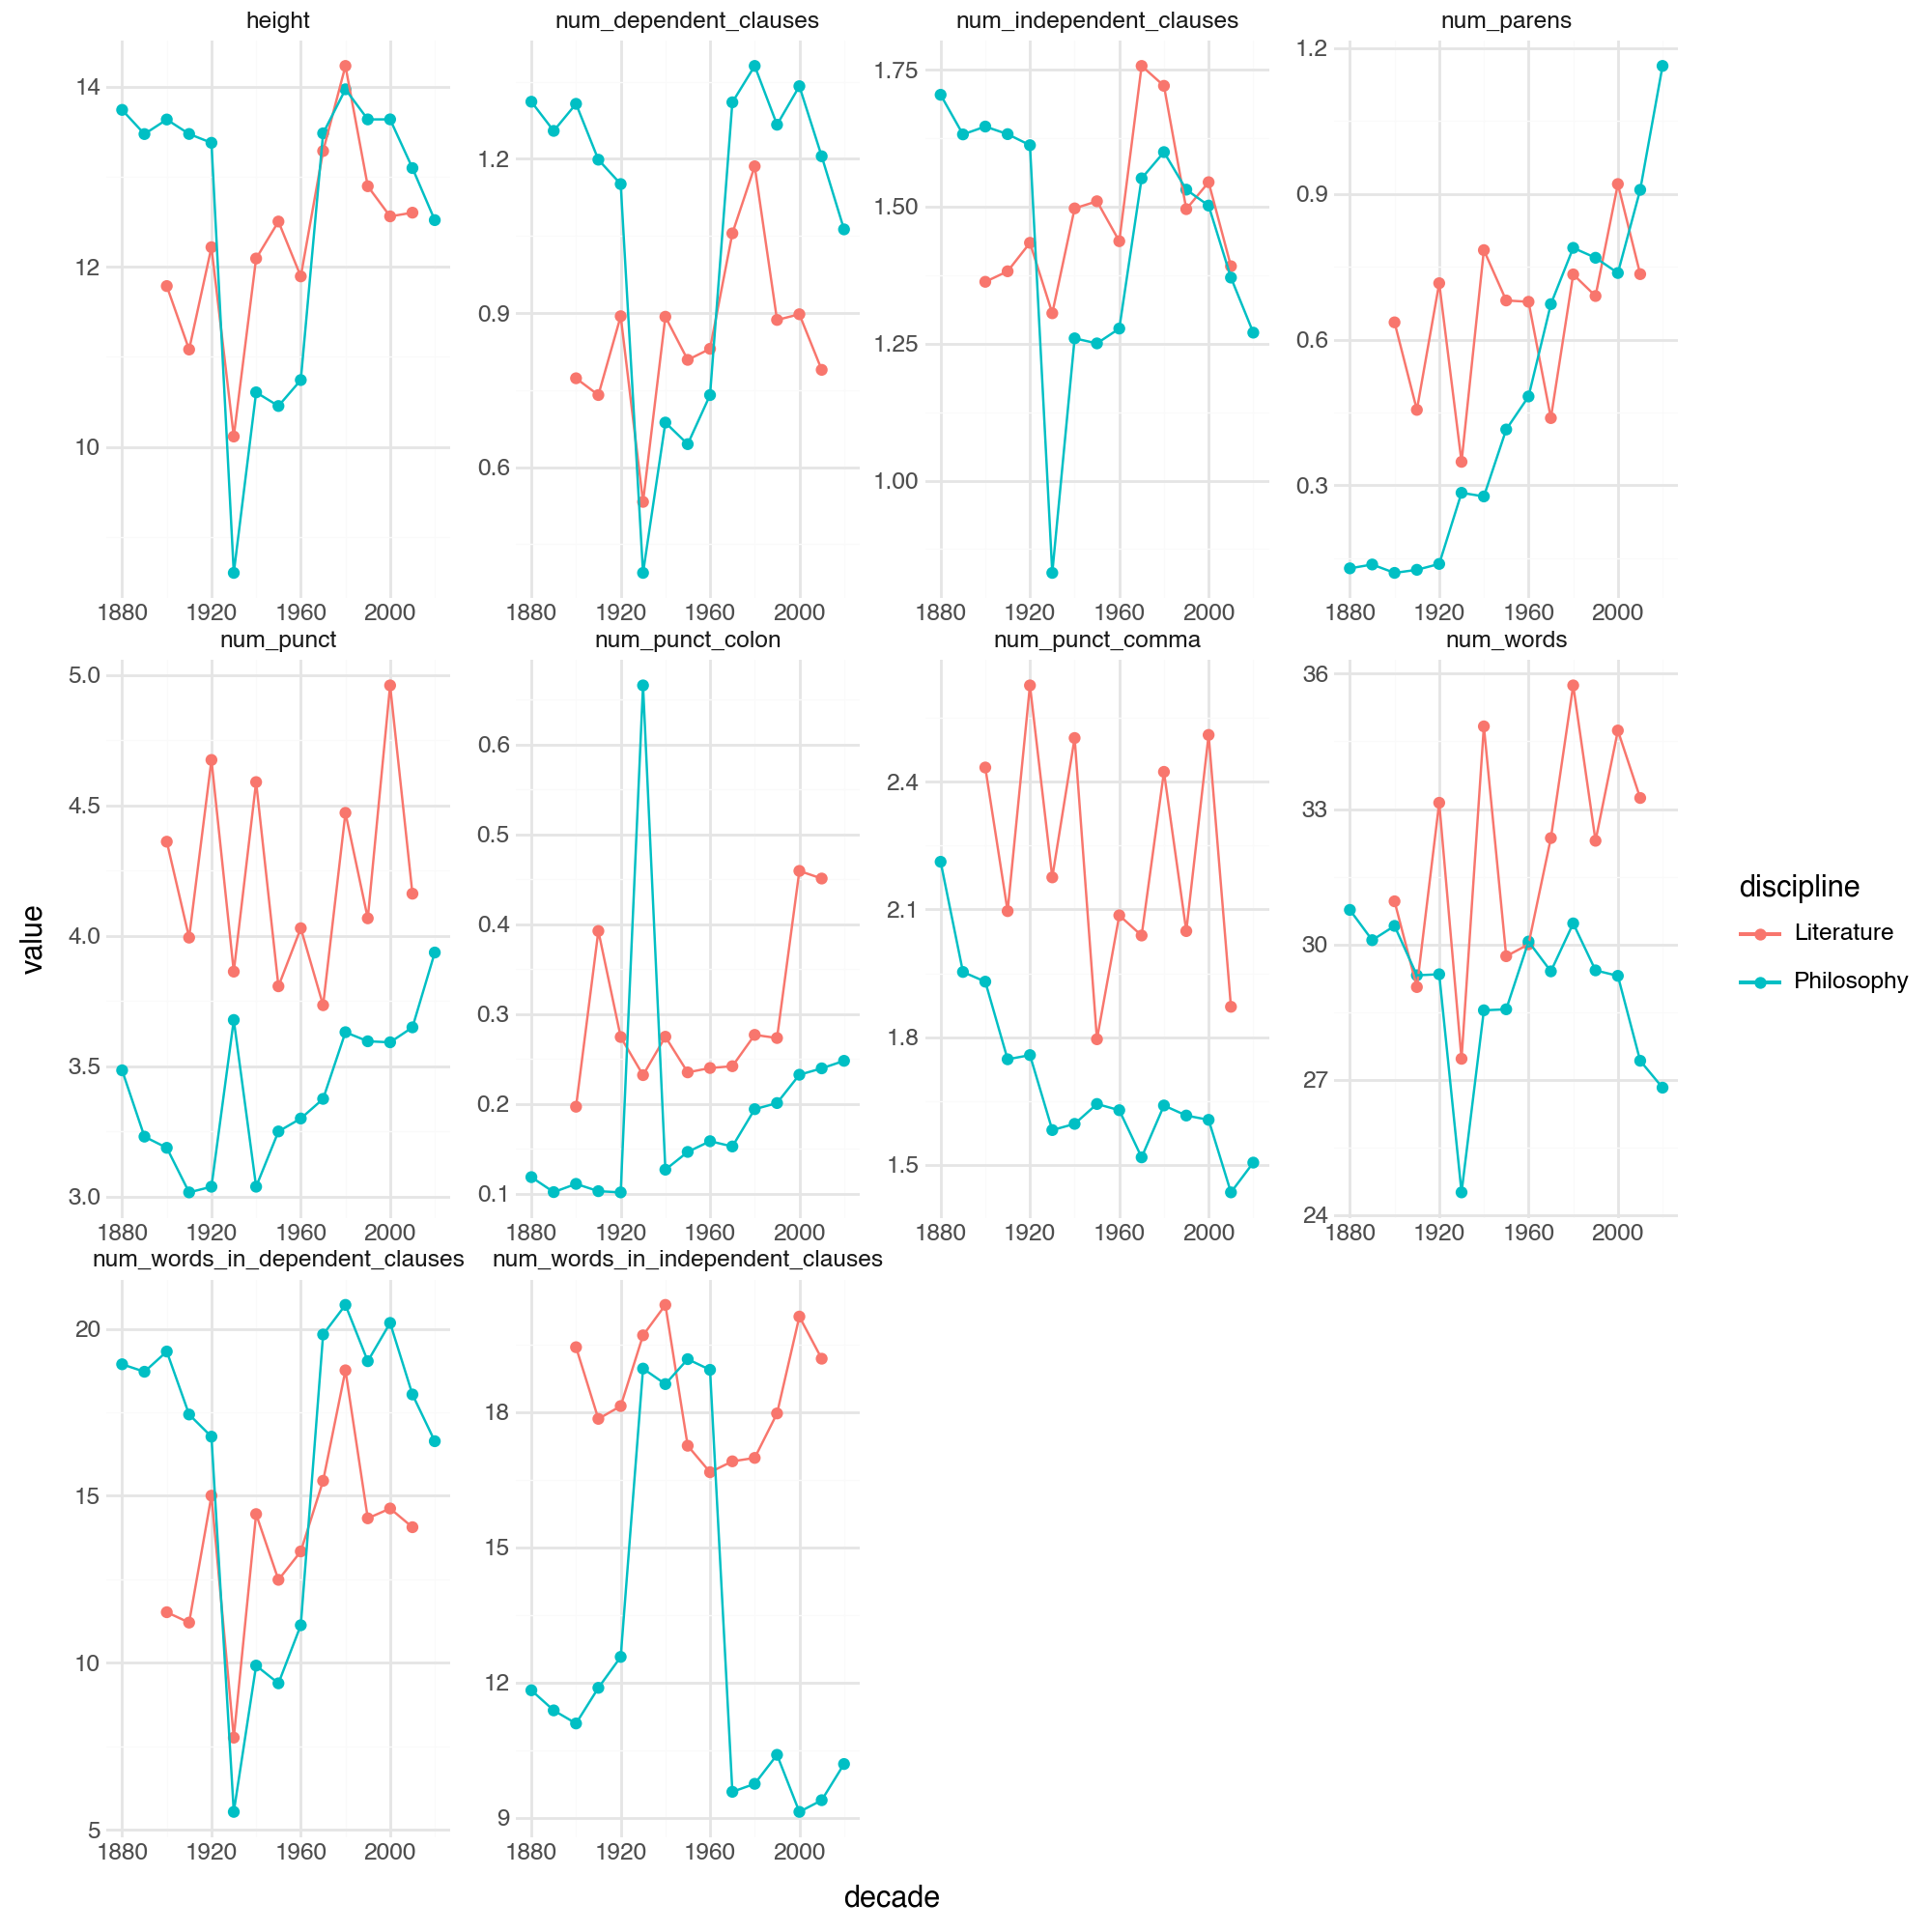

In [12]:
# !pip install plotnine
import plotnine as p9
p9.options.figure_size = (10, 10)
fig = p9.ggplot(figdf, p9.aes(x='decade', y='value', color='discipline')) + p9.geom_point() + p9.geom_line() + p9.theme_minimal() + p9.facet_wrap('variable', scales='free')
fig

In [36]:
# df_jstor_tree.iloc[0]
s=(df_jstor_tree.groupby(['is_part_of','decade'])['id'].nunique() >= 25)
ok = set(s[s].index)
ok

{('Canadian Journal of Philosophy', 1970),
 ('Canadian Journal of Philosophy', 1980),
 ('Canadian Journal of Philosophy', 1990),
 ('Canadian Journal of Philosophy', 2000),
 ('Canadian Journal of Philosophy', 2010),
 ('Dialectica', 1940),
 ('Dialectica', 1950),
 ('Dialectica', 1960),
 ('Erkenntnis (1930-1938)', 1930),
 ('Erkenntnis (1975-)', 2020),
 ('International Journal of Ethics', 1890),
 ('International Journal of Ethics', 1900),
 ('International Journal of Ethics', 1910),
 ('International Journal of Ethics', 1920),
 ('Proceedings of the Aristotelian Society', 1880),
 ('Synthese', 2010),
 ('Synthese', 2020),
 ('The Journal of Philosophy', 1920),
 ('The Journal of Philosophy', 1940),
 ('The Journal of Philosophy', 1950),
 ('The Journal of Philosophy', 1960),
 ('The Philosophical Review', 1890),
 ('The Philosophical Review', 1900),
 ('The Philosophical Review', 1910),
 ('The Philosophical Review', 1920)}

In [37]:
p9.options.figure_size = (16, 9)
p9.options.dpi = 300
odf = df_jstor_tree.groupby(['is_part_of','decade']).mean(numeric_only=True).reset_index()
odf['filter'] = list(zip(odf['is_part_of'], odf['decade']))
# filter to only include journals with at least 10 articles per decade
odf = odf[odf['filter'].isin(ok)]
odf

,is_part_of,decade,num_words,height,num_independent_clauses,num_dependent_clauses,num_words_in_dependent_clauses,num_words_in_independent_clauses,num_punct,num_punct_colon,...,num_words_in_dependent_clauses_per_word,num_words_in_independent_clauses_per_word,num_punct_per_word,num_punct_colon_per_word,num_punct_comma_per_word,num_parens_per_word,review_required,contributed_content,year,filter
0,Canadian Journal of Philosophy,1970,29.919308,13.842920,1.574693,1.434832,21.798910,8.120398,3.301978,0.130839,...,0.536263,0.463737,0.114769,0.003947,0.043163,0.018779,1.0,0.0,1975.182680,"(Canadian Journal of Philosophy, 1970)"
1,Canadian Journal of Philosophy,1980,30.663686,14.271459,1.638650,1.495947,22.512319,8.151367,3.480528,0.163885,...,0.544098,0.455902,0.115635,0.004202,0.045774,0.019148,1.0,0.0,1984.857137,"(Canadian Journal of Philosophy, 1980)"
2,Canadian Journal of Philosophy,1990,29.065494,13.827727,1.572521,1.316590,19.371475,9.694019,3.319007,0.168344,...,0.499059,0.500941,0.114785,0.004680,0.046528,0.017456,1.0,0.0,1994.403784,"(Canadian Journal of Philosophy, 1990)"
3,Canadian Journal of Philosophy,2000,29.895452,14.029170,1.585807,1.428660,21.293514,8.601938,3.413154,0.199252,...,0.532863,0.467137,0.118221,0.006048,0.046866,0.018136,1.0,0.0,2005.140445,"(Canadian Journal of Philosophy, 2000)"
4,Canadian Journal of Philosophy,2010,27.263842,13.349768,1.420106,1.275584,18.626542,8.637300,3.397766,0.226029,...,0.486499,0.513501,0.136913,0.009237,0.046623,0.021588,1.0,0.0,2014.980384,"(Canadian Journal of Philosophy, 2010)"
5,Dialectica,1940,28.656311,7.213446,0.876674,0.076788,1.185460,27.470851,3.012955,0.125841,...,0.028978,0.971022,0.116492,0.003973,0.049569,0.006168,1.0,0.0,1947.876108,"(Dialectica, 1940)"
6,Dialectica,1950,28.255483,8.183939,1.021653,0.220046,3.077739,25.177744,3.251409,0.120152,...,0.082988,0.917012,0.121296,0.003575,0.049045,0.012611,1.0,0.0,1954.287962,"(Dialectica, 1950)"
7,Dialectica,1960,29.999256,8.224355,0.989635,0.225331,3.523960,26.475296,3.208645,0.154962,...,0.087918,0.912082,0.115181,0.004510,0.044080,0.013120,1.0,0.0,1964.470277,"(Dialectica, 1960)"
13,Erkenntnis (1930-1938),1930,22.397826,6.542001,0.489784,0.043477,0.610765,21.787062,4.003735,0.928809,...,0.018340,0.981660,0.203985,0.038312,0.057270,0.012924,1.0,0.0,1933.055317,"(Erkenntnis (1930-1938), 1930)"
19,Erkenntnis (1975-),2020,26.117741,12.345656,1.274820,1.043988,15.985459,10.132282,3.856140,0.218981,...,0.405730,0.594270,0.163100,0.009598,0.051168,0.040922,1.0,0.0,2020.500160,"(Erkenntnis (1975-), 2020)"


In [39]:
figdf = odf.drop(columns=['year','contributed_content','review_required','filter']).melt(id_vars=['decade','is_part_of'])
figdf = figdf[(figdf['variable'] == 'num_words') | ~figdf['variable'].str.contains('per_word')]
fig = p9.ggplot(
    figdf, 
    p9.aes(x='decade', y='value', color='is_part_of')
) + p9.geom_point() + p9.geom_line() + p9.theme_minimal() + p9.facet_wrap('variable', scales='free', nrow=2) + p9.labs(color='Journal', title='Syntactic statistics')
fig.save('../figures/jstor_syntactic_stats.png')
fig

In [ ]:
# df_combined.groupby(['discipline','decade'])['id'].nunique()


MultiIndex([(1880,  'Proceedings of the Aristotelian Society'),
            (1890,          'International Journal of Ethics'),
            (1890,  'Proceedings of the Aristotelian Society'),
            (1890,                 'The Philosophical Review'),
            (1900,          'International Journal of Ethics'),
            (1900,  'Proceedings of the Aristotelian Society'),
            (1900,                 'The Philosophical Review'),
            (1910,          'International Journal of Ethics'),
            (1910,  'Proceedings of the Aristotelian Society'),
            (1910,                 'The Philosophical Review'),
            (1920,          'International Journal of Ethics'),
            (1920,  'Proceedings of the Aristotelian Society'),
            (1920,                'The Journal of Philosophy'),
            (1920,                 'The Philosophical Review'),
            (1930,                   'Erkenntnis (1930-1938)'),
            (1930,                      

In [16]:
# !pip install plotnine
import plotnine as p9
p9.options.figure_size = (10, 10)

